In [1]:
![logo](https://www.databolt.tech/images/logo.png)
Accelerate data science [www.databolt.tech](https://www.databolt.tech) | [github.com/d6t/d6t-python](https://github.com/d6t/d6t-python)


SyntaxError: invalid syntax (<ipython-input-1-567fd997e88d>, line 2)

In [1]:
import d6tflow
import cfg, tasks
# import visualize

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm

import importlib # optional
importlib.reload(cfg)
importlib.reload(tasks)
# importlib.reload(visualize)

task = tasks.TaskGetData()
# task.invalidate(confirm=False)
d6tflow.preview(task)

d6tflow.run(task)


Welcome to d6tflow!
Welcome to d6tpipe!

└─--[TaskGetData-{} (COMPLETE)]


INFO: Informed scheduler that task   TaskGetData__99914b932b   has status   DONE
INFO: Done scheduling tasks
INFO: Running Worker with 1 processes
INFO: Worker Worker(salt=342842212, workers=1, host=DESKTOP-D9OFHV1, username=deepmind, pid=5660) was stopped. Shutting down Keep-Alive thread
INFO: 
===== Luigi Execution Summary =====

Scheduled 1 tasks of which:
* 1 complete ones were encountered:
    - 1 TaskGetData()

Did not run any tasks
This progress looks :) because there were no failed tasks or missing dependencies

===== Luigi Execution Summary =====



True

In [2]:
df_heart_raw = tasks.TaskGetData().outputLoad()
df_heart = df_heart_raw.copy()

In [3]:
cfg_col_cat = ['sex',
 'fbs',
 'exang',
 'restecg',
 'slope',
 'cp',
 'thal',
 'ca']
cfg_col_num = ['oldpeak',
 'age',
 'trestbps',
 'thalach',
 'chol']

In [4]:
df_heart.apply(lambda x:len(x.unique())).sort_values()

sex           2
fbs           2
exang         2
target        2
restecg       3
slope         3
cp            4
thal          4
ca            5
oldpeak      40
age          41
trestbps     49
thalach      91
chol        152
dtype: int64

In [5]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


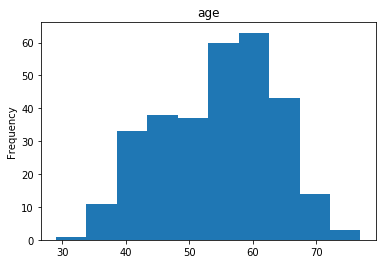

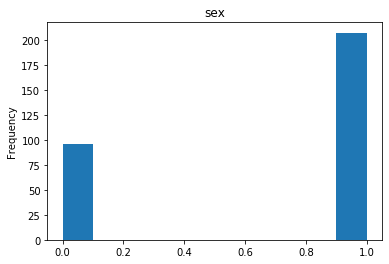

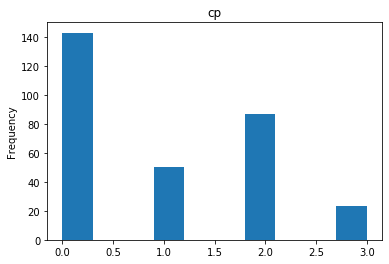

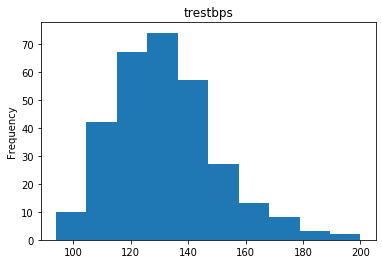

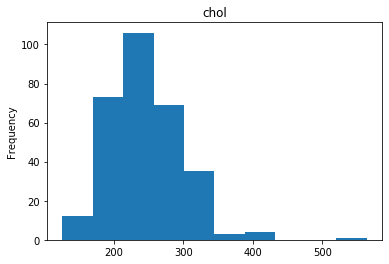

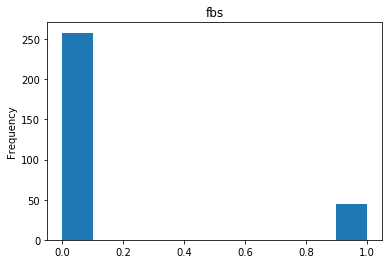

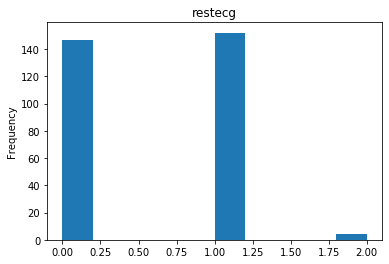

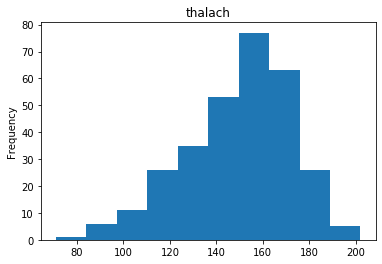

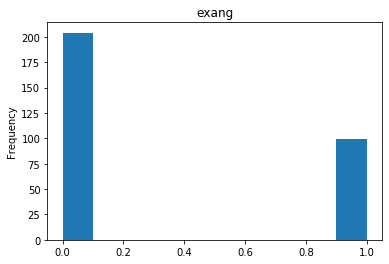

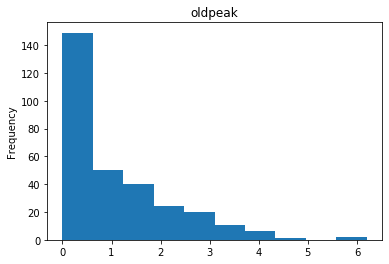

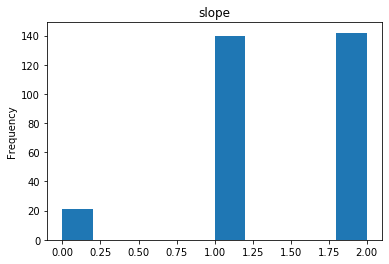

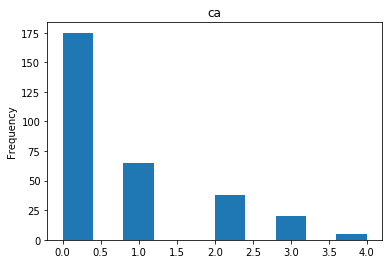

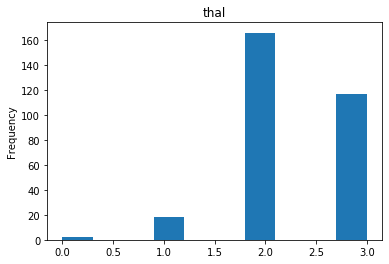

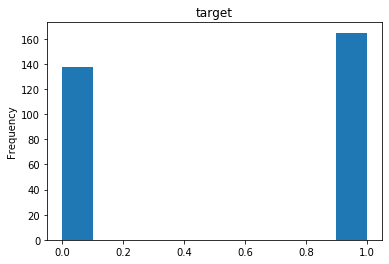

In [6]:
for icol in df_heart.columns:
    plt.figure()
    df_heart[icol].plot.hist(title=icol)

In [7]:

for icol in cfg_col_cat:
    print(icol)
    print(df_heart.groupby(icol)['target'].agg(['mean','count']))
#     print(pd.crosstab(df_heart[icol],df_heart['target'],normalize='columns',margins=True).round(2))
#    sns.catplot(x=icol,y='target',data=df_heart,kind="count")
#    df_heart[icol].plot.hist(title=icol)

sex
         mean  count
sex                 
0    0.750000     96
1    0.449275    207
fbs
         mean  count
fbs                 
0    0.550388    258
1    0.511111     45
exang
           mean  count
exang                 
0      0.696078    204
1      0.232323     99
restecg
             mean  count
restecg                 
0        0.462585    147
1        0.631579    152
2        0.250000      4
slope
           mean  count
slope                 
0      0.428571     21
1      0.350000    140
2      0.753521    142
cp
        mean  count
cp                 
0   0.272727    143
1   0.820000     50
2   0.793103     87
3   0.695652     23
thal
          mean  count
thal                 
0     0.500000      2
1     0.333333     18
2     0.783133    166
3     0.239316    117
ca
        mean  count
ca                 
0   0.742857    175
1   0.323077     65
2   0.184211     38
3   0.150000     20
4   0.800000      5


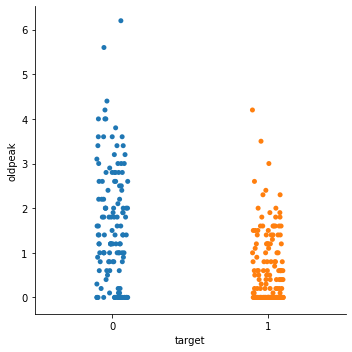

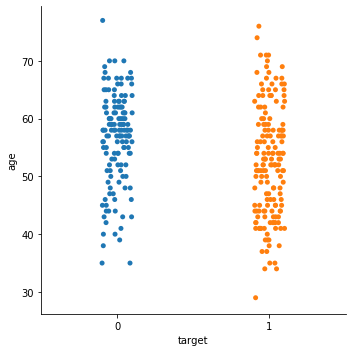

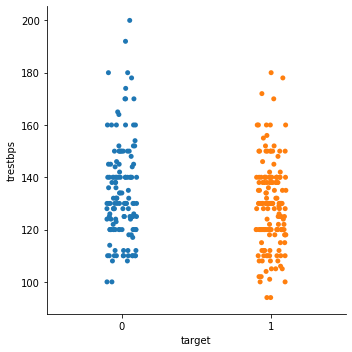

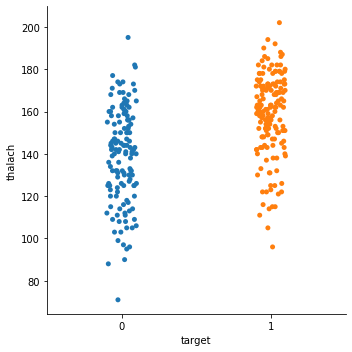

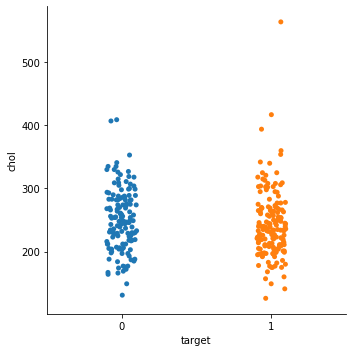

In [8]:
for icol in cfg_col_num:
    sns.catplot(x="target", y=icol, data=df_heart)

In [9]:
df_heart.groupby('sex')['target'].mean()

sex
0    0.750000
1    0.449275
Name: target, dtype: float64

In [10]:
df_heart['age_log']=np.log(df_heart['age'])

In [16]:
mod_ols = sm.Logit(df_heart['target'],df_heart[cfg_col_cat+cfg_col_num])

res_ols = mod_ols.fit()
print(res_ols.summary())
df_heart['target_ols_p']=res_ols.predict()

Optimization terminated successfully.
         Current function value: 0.351932
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      290
Method:                           MLE   Df Model:                           12
Date:                Tue, 24 Mar 2020   Pseudo R-squ.:                  0.4893
Time:                        15:44:24   Log-Likelihood:                -106.64
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 4.088e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -1.6381      0.452     -3.625      0.000      -2.524      -0.752
fbs           -0.0115      0.

In [12]:
from sklearn.metrics import classification_report
cfg_thresh = 0.5
print(pd.crosstab((res_ols.predict()>cfg_thresh).astype(int),df_heart['target']))
print(classification_report(df_heart['target'], (res_ols.predict()>cfg_thresh).astype(int)))
print(classification_report((res_ols.predict()>cfg_thresh).astype(int), df_heart['target']))

target    0    1
row_0           
0       106   13
1        32  152
              precision    recall  f1-score   support

           0       0.89      0.77      0.82       138
           1       0.83      0.92      0.87       165

    accuracy                           0.85       303
   macro avg       0.86      0.84      0.85       303
weighted avg       0.86      0.85      0.85       303

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       119
           1       0.92      0.83      0.87       184

    accuracy                           0.85       303
   macro avg       0.84      0.86      0.85       303
weighted avg       0.86      0.85      0.85       303



In [13]:
from sklearn.metrics import classification_report
cfg_thresh = 0.7
print(pd.crosstab((res_ols.predict()>cfg_thresh).astype(int),df_heart['target']))
print(classification_report(df_heart['target'], (res_ols.predict()>cfg_thresh).astype(int)))
print(classification_report((res_ols.predict()>cfg_thresh).astype(int), df_heart['target']))

target    0    1
row_0           
0       124   38
1        14  127
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       138
           1       0.90      0.77      0.83       165

    accuracy                           0.83       303
   macro avg       0.83      0.83      0.83       303
weighted avg       0.84      0.83      0.83       303

              precision    recall  f1-score   support

           0       0.90      0.77      0.83       162
           1       0.77      0.90      0.83       141

    accuracy                           0.83       303
   macro avg       0.83      0.83      0.83       303
weighted avg       0.84      0.83      0.83       303



In [14]:
cfg_thresh = 0.5
print(pd.crosstab((res_ols.predict()>cfg_thresh).astype(int),df_heart['target']))
cfg_thresh = 0.3
print(pd.crosstab((res_ols.predict()>cfg_thresh).astype(int),df_heart['target']))
cfg_thresh = 0.7
print(pd.crosstab((res_ols.predict()>cfg_thresh).astype(int),df_heart['target']))


target    0    1
row_0           
0       106   13
1        32  152
target   0    1
row_0          
0       95    8
1       43  157
target    0    1
row_0           
0       124   38
1        14  127


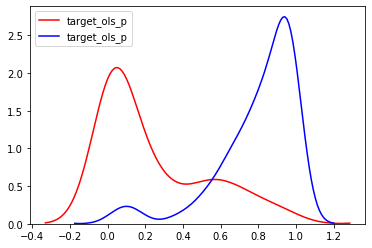

In [17]:
sns.kdeplot(df_heart.loc[df_heart['target']==0, 'target_ols_p'], color="r")
sns.kdeplot(df_heart.loc[df_heart['target']==1, 'target_ols_p'], color="b")

In [78]:
import lightgbm

mod_lgbm = lightgbm.LGBMClassifier(max_depth=2,learning_rate=0.1,n_estimators=100,reg_alpha=1.0)
mod_lgbm.fit(df_heart[cfg_col_cat+cfg_col_num],df_heart['target'])
df_heart['target_lgbm_p']=mod_lgbm.predict_proba(df_heart[cfg_col_cat+cfg_col_num])[:,0]

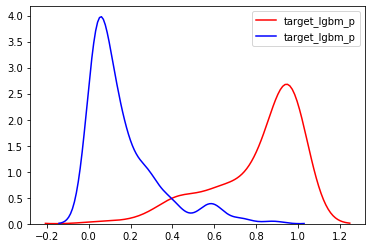

In [79]:
sns.kdeplot(df_heart.loc[df_heart['target']==0, 'target_lgbm_p'], color="r")
sns.kdeplot(df_heart.loc[df_heart['target']==1, 'target_lgbm_p'], color="b")

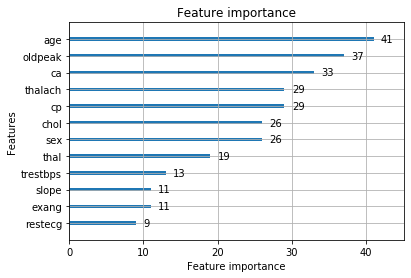

In [80]:
lightgbm.plot_importance(mod_lgbm)

In [70]:
dict(zip(df_heart[cfg_col_cat+cfg_col_num].columns,range(len(df_heart[cfg_col_cat+cfg_col_num].columns))))

{'sex': 0,
 'fbs': 1,
 'exang': 2,
 'restecg': 3,
 'slope': 4,
 'cp': 5,
 'thal': 6,
 'ca': 7,
 'oldpeak': 8,
 'age': 9,
 'trestbps': 10,
 'thalach': 11,
 'chol': 12}

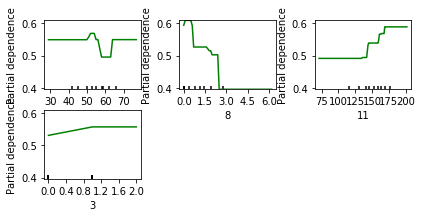

In [82]:
from sklearn.inspection import plot_partial_dependence
plot_partial_dependence(mod_lgbm, df_heart[cfg_col_cat+cfg_col_num], [9,8,11,3]) 